In [1]:
import sys
sys.path.append("../../../")

## 数据

In [2]:
from pylib.utils.functions_for_classification import lin_separable_2d_2cls, plot_scatter
import matplotlib.pyplot as plt

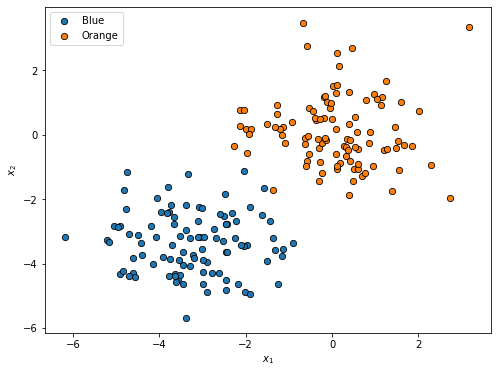

In [3]:
X, y = lin_separable_2d_2cls(200)
plt.figure(figsize=(8, 6))
plot_scatter(X, y)
plt.show()

## Fisher判别分析

In [4]:
from sklearn.base import BaseEstimator, ClassifierMixin
from pylib.utils.functions_for_classification import plot_decision_boundary
import numpy as np

In [5]:
class FisherDiscriminantAnalysis(BaseEstimator, ClassifierMixin):
    """Fisher判别分析"""
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        n0 = len(y[y == 0])
        n1 = len(y[y == 1])
        n = len(y)
        X0 = X[y == 0]
        X1 = X[y == 1]
        mu0 = np.mean(X0, axis=0).reshape(1, -1)
        mu1 = np.mean(X1, axis=0).reshape(1, -1)
        # the uninformative prior
        P0 = n0 / n
        P1 = n1 / n
        mu = (P0 * mu0) + (P1 * mu1)
        Sigma_b = P0 * (mu0 - mu).T @ (mu0 - mu) + P1 * (mu1 - mu).T @ (mu1 - mu)
        self.Theta = np.linalg.pinv(Sigma_b) @ (mu0 - mu1).T
        self.theta0 = (np.mean(X0 @ self.Theta) + np.mean(X1 @ self.Theta)) / 2.

        return self
    
    def predict(self, X):
        y_pred = X @ self.Theta  - self.theta0
        y_pred[y_pred > 0] = 0
        y_pred[y_pred < 0] = 1
        
        return y_pred

In [6]:
fda = FisherDiscriminantAnalysis()
fda.fit(X, y)

FisherDiscriminantAnalysis()

In [7]:
err = 1 - fda.score(X, y)
print("样本误差：{:.3f}".format(err))

样本误差：0.005


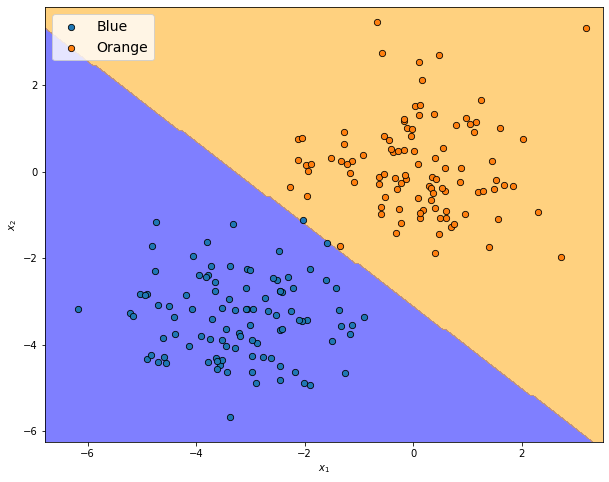

In [8]:
# 画出决策边界
plt.figure(figsize=(10, 8))
plot_decision_boundary(X, y, classifier=fda)
plt.show()